In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

import re
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:/Users/AA/DataScience/datasets/average-per-capita-food-consumption-kg-per-year.csv")
df.tail()

,Heading,Urban,Rural,First Quintile (Poorest),Second Quintile,Third Quintile,Fourth Quintile,Fifth Quintile (Richest),Total
54,Mushroom,0.3,0.2,0.0,0.1,0.1,0.2,0.7,0.2
55,Sugar,8.6,7.6,4.1,6.2,8.0,10.3,11.3,8.0
56,SAKHKHAR,0.3,0.1,0.2,0.2,0.1,0.4,0.1,0.2
57,Honey,0.1,0.0,0.0,0.0,0.0,0.1,0.1,0.1
58,Nepal,6.7,6.7,5.6,5.5,6.8,7.6,8.1,6.7


Understanding Quintiles

Quintiles are a statistical way to divide a population into five equal groups based on a specific attribute, such as income. Each quintile represents 20% of the population.

First Quintile (Poorest): This group includes the poorest 20% of the population.

Second Quintile: This group includes the next 20% of the population, following the first quintile.

Third Quintile: This group represents the middle 20% of the population.

Fourth Quintile: This group includes the second richest 20% of the population.

Fifth Quintile (Richest): This group includes the wealthiest 20% of the population.

Based on the data from https://www.worldometers.info/world-population/nepal-population/ (worldometer) the 
population in 2015/16 of Urban was 5,317,799 and rural population was 22,292,526 and total population was 27,610,325.




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Heading                   59 non-null     object 
 1   Urban                     59 non-null     float64
 2   Rural                     59 non-null     float64
 3   First Quintile (Poorest)  59 non-null     float64
 4   Second Quintile           59 non-null     float64
 5   Third Quintile            59 non-null     float64
 6   Fourth Quintile           59 non-null     float64
 7   Fifth Quintile (Richest)  59 non-null     float64
 8   Total                     59 non-null     float64
dtypes: float64(8), object(1)
memory usage: 4.3+ KB


In [7]:
df.isna().sum()

Heading                     0
Urban                       0
Rural                       0
First Quintile (Poorest)    0
Second Quintile             0
Third Quintile              0
Fourth Quintile             0
Fifth Quintile (Richest)    0
Total                       0
dtype: int64

In [8]:
df.describe()

,Urban,Rural,First Quintile (Poorest),Second Quintile,Third Quintile,Fourth Quintile,Fifth Quintile (Richest),Total
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,6.711864,6.694915,5.605085,5.461017,6.801695,7.567797,8.096610,6.703390
std,13.037533,15.522280,15.498581,13.529304,16.093686,16.276273,15.032413,14.186455
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350000,0.350000,0.100000,0.200000,0.300000,0.450000,0.700000,0.300000
50%,2.000000,1.900000,1.100000,1.300000,1.800000,3.000000,3.300000,1.900000
75%,5.950000,6.250000,4.700000,5.000000,6.600000,8.150000,8.000000,6.600000
max,65.100000,109.400000,106.600000,95.100000,111.800000,103.800000,80.200000,92.800000


In [9]:
df['Heading'].unique()

array(['Fine rice', 'Coarse rice', 'Beaten, flattened\nrice', 'Maize',
       'Maize flour', 'Wheat, Wheat flour', 'Millet', 'Buckwheat',
       'Barley', 'Black Gram (Mas)', 'Lentil (Musuro)', 'Red Gram',
       'Horse Gram (Chana)', 'Beans', 'Soybean', 'Mutton (Goat)',
       'Mutton (Sheep)', 'Buff', 'Chicken', 'Pork', 'Fish', 'Egg', 'Milk',
       'Condensed milk', 'Baby milk/Powder\nmilk', 'Curd', 'Paneer',
       'Ghee', 'Vegetable Ghee/oil', 'Mustard oil', 'Sunflower oil',
       'Soybean oil', 'Bananas', 'Citrus fruits', 'Mangoes', 'Apples',
       'Pineapple', 'Papaya', 'Grapes', 'Potato', 'Cauliflower/Cabbage',
       'Tomato', 'Green beans', 'Cucumber', 'LAUKA, Pumpkin,…',
       'Radish, ……', 'Onion', 'Colasis,………', 'BHANTA', 'ISHKUS',
       'Ladies finger', 'Bitter guard', 'MOTARKOSA, …', 'PARWAL',
       'Mushroom', 'Sugar', 'SAKHKHAR', 'Honey', 'Nepal'], dtype=object)

In [10]:
def clean(text):
    text = text.replace('\n', ' ')
    text=re.sub(r'[^A-Za-z0-9\s/]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text=text.lower()
    return text

In [11]:
df['Heading'] = df['Heading'].apply(clean)

In [12]:
df['Heading'].unique()

array(['fine rice', 'coarse rice', 'beaten flattened rice', 'maize',
       'maize flour', 'wheat wheat flour', 'millet', 'buckwheat',
       'barley', 'black gram mas', 'lentil musuro', 'red gram',
       'horse gram chana', 'beans', 'soybean', 'mutton goat',
       'mutton sheep', 'buff', 'chicken', 'pork', 'fish', 'egg', 'milk',
       'condensed milk', 'baby milk/powder milk', 'curd', 'paneer',
       'ghee', 'vegetable ghee/oil', 'mustard oil', 'sunflower oil',
       'soybean oil', 'bananas', 'citrus fruits', 'mangoes', 'apples',
       'pineapple', 'papaya', 'grapes', 'potato', 'cauliflower/cabbage',
       'tomato', 'green beans', 'cucumber', 'lauka pumpkin', 'radish',
       'onion', 'colasis', 'bhanta', 'ishkus', 'ladies finger',
       'bitter guard', 'motarkosa', 'parwal', 'mushroom', 'sugar',
       'sakhkhar', 'honey', 'nepal'], dtype=object)

In [13]:
df.Urban.unique()

array([57.5, 65.1,  6.7,  4. ,  6.2, 24.6,  4.1,  0. ,  3.4,  5.3,  2.3,
        0.5,  0.4,  1. ,  3.7,  1.5,  8.4,  0.9,  2. ,  2.8, 45.9,  1.9,
        0.1,  0.8, 22. ,  6.6,  5.5,  5.7, 29.2, 11.8, 10.3,  3.6,  4.4,
        8.9,  1.4,  3. ,  1.8,  0.7,  1.1,  0.3,  8.6])

In [14]:
df.Urban.describe()

count    59.000000
mean      6.711864
std      13.037533
min       0.000000
25%       0.350000
50%       2.000000
75%       5.950000
max      65.100000
Name: Urban, dtype: float64

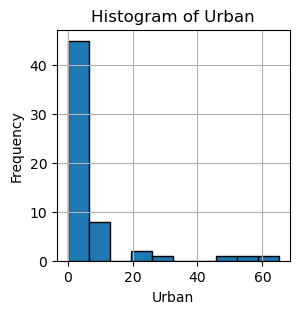

<Figure size 640x480 with 0 Axes>

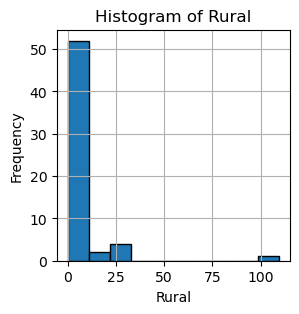

<Figure size 640x480 with 0 Axes>

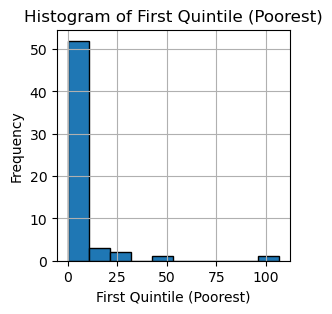

<Figure size 640x480 with 0 Axes>

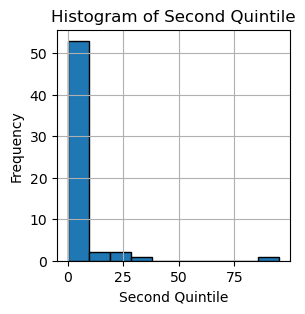

<Figure size 640x480 with 0 Axes>

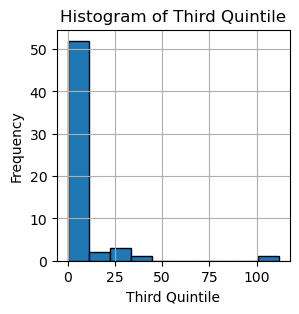

<Figure size 640x480 with 0 Axes>

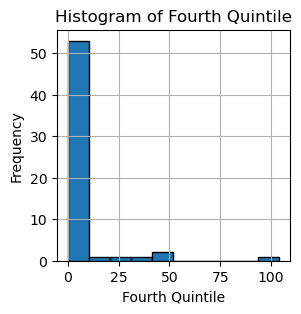

<Figure size 640x480 with 0 Axes>

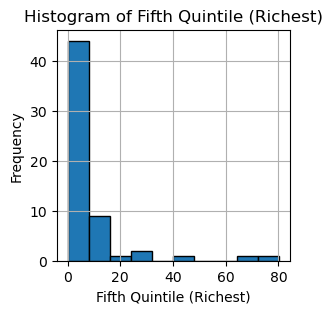

<Figure size 640x480 with 0 Axes>

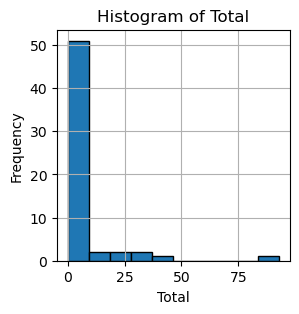

<Figure size 640x480 with 0 Axes>

In [15]:
for column in df.columns:
    if column != 'Heading':
        plt.figure(figsize=(3,3))
        plt.hist(df[column], bins=10, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        plt.savefig('hist.png')